In [21]:
1-Install TensorFlow:

In [18]:
!pip install tensorflow

In [ ]:
 This command installs the TensorFlow library, which is essential for building and training neural networks in Python.

In [ ]:
2-Load CIFAR-10 Dataset and Preprocess Data:

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the classes that can fly (1) and cannot fly (0)
fly_classes = [0, 2]  # airplane, bird
no_fly_classes = [1, 3, 4, 5, 6, 7, 8, 9]  # others

# Map classes to binary labels
def map_labels(labels):
    return np.array([1 if label in fly_classes else 0 for label in labels])

y_train = map_labels(y_train)
y_test = map_labels(y_test)

# Convert labels to categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
 This code block loads the CIFAR-10 dataset and preprocesses it by normalizing the image data and converting the class labels into binary labels (1 for objects that can fly and 0 for those that cannot). It then converts these labels to a categorical format suitable for classification.

In [ ]:
3-Define the CNN Architecture:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,778 (1.36 MB)

 Trainable params: 355,778 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 This code defines the architecture of the Convolutional Neural Network (CNN). The model consists of convolutional layers for feature extraction, max-pooling layers for downsampling, a flatten layer to convert the 2D matrix data to a vector, dense layers for classification, and a dropout layer to prevent overfitting. The output layer uses softmax activation to output probabilities for the two classes.

In [ ]:
4-Compile the Model with Appropriate Loss Function and Optimizer:

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
This code compiles the CNN model. It specifies the Adam optimizer for training, categorical cross-entropy as the loss function (suitable for classification tasks with more than two categories), and accuracy as a metric to evaluate the model's performance.

In [ ]:
5-Train the Model:

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8043 - loss: 0.4577 - val_accuracy: 0.8492 - val_loss: 0.3668
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8470 - loss: 0.3676 - val_accuracy: 0.8756 - val_loss: 0.3174
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8690 - loss: 0.3203 - val_accuracy: 0.8779 - val_loss: 0.2976
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8803 - loss: 0.2956 - val_accuracy: 0.8900 - val_loss: 0.2786
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8931 - loss: 0.2600 - val_accuracy: 0.8937 - val_loss: 0.2709
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9040 - loss: 0.2437 - val_accuracy: 0.8864 - val_loss: 0.2810
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9142 - loss: 0.2193 - val_accuracy: 0.8948 - val_loss: 0.2738
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9160 - loss: 0.2056 - 

In [ ]:
 This code trains the CNN model on the training dataset for 10 epochs with a batch size of 64. It also uses 20% of the training data for validation to monitor the model's performance on unseen data during training.

In [ ]:
6-Evaluate the Model:

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8854 - loss: 0.3013
Test accuracy: 0.8870


In [ ]:
This code evaluates the trained model on the test dataset to determine its performance in terms of loss and accuracy. The test accuracy provides a measure of how well the model generalizes to new, unseen data.

In [ ]:
7-Plot the Training and Validation Accuracy and Loss:

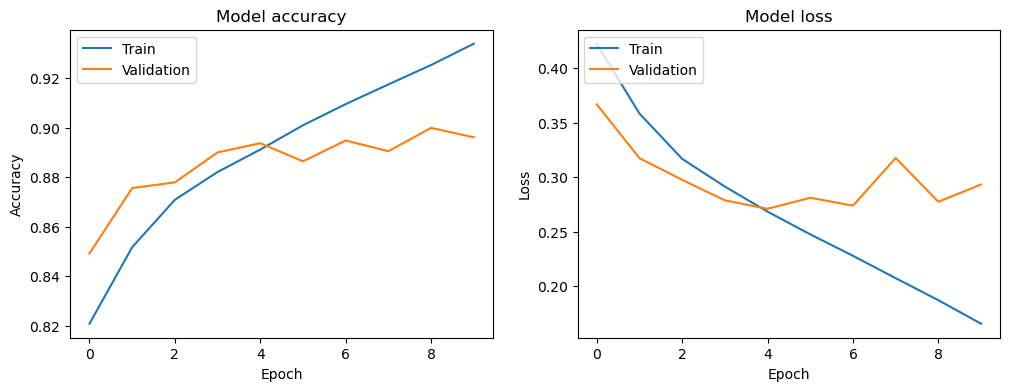

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
This code plots the training and validation accuracy and loss over the epochs. These plots help in visualizing how the model's performance improves over time and whether it overfits or underfits. The left plot shows the accuracy for both training and validation sets, while the right plot shows the loss for both sets.s


In [ ]:
8-Compute Evaluation Metrics and Display Confusion Matrix:

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.7480
Recall: 0.6560
F1 Score: 0.6990
Confusion Matrix:
[[7558  442]
 [ 688 1312]]


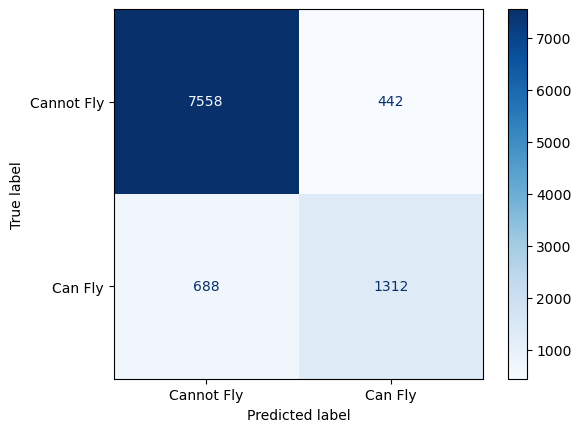

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict labels for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, f1 score
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Cannot Fly', 'Can Fly'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
This code block computes and displays several evaluation metrics: precision, recall, F1 score, and the confusion matrix. Precision measures the accuracy of the positive predictions, recall measures the model's ability to find all positive instances, and F1 score is the harmonic mean of precision and recall. The confusion matrix visualizes the performance of the classification model, showing the counts of true positive, true negative, false positive, and false negative predictions. The confusion matrix is also plotted for better visualization.